<a href="https://colab.research.google.com/github/simodepth/time-series-traffic-predictions/blob/main/Time_Series_Traffic_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traffic Forecasting Time-Series with Python

You can use this to predict any numerical values that occur over time (sales, traffic, number of cookies you eat a day, twitter activity by large babies, etc.)





#Requirements & Assumptions

- Upload a CSV file from **Google Analytics**: the more data the more accurate the predictions
- Headers must look like the following:

![alt text](https://i.imgur.com/QebUg9F.png)

#Run the following cell & upload your time series data 

Use 3+ years worth of time series data for optimal predictions.

In [ ]:
# Import nessecary libraries and data. [Shift + Return to run cell]
import os
import yaml
import datetime
from datetime import date
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

#import plotly.offline as py
#py.init_notebook_mode()

# Did some pre processing of the CSV. 
# Specficially I:
#   - truncated a bunch of notes at the top of the file
 #   - removed some whitespace at the end of file

from google.colab import files
uploaded = files.upload()

#Upload your Time Series data:

Saving M1Y.csv to M1Y (1).csv


<Figure size 640x480 with 0 Axes>

#Import data into a Pandas dataframe:

Change the below .csv name to match your upload!

In [ ]:
import io
df = pd.read_csv('/content/M1Y.csv') #<--Change .csv name to your uploaded .csv name.
# Dataset is now stored in a Pandas Dataframe


#Validate the dataframe's head (top 5 rows)

In [ ]:
df.head()

,Ds,Y
0,5/31/21,66955
1,6/1/21,55444
2,6/2/21,55389
3,6/3/21,48441
4,6/4/21,48071


# Explore known dataframe types (not necessary, but good to know)

In [ ]:
print(df.dtypes)

Ds    object
Y      int64
dtype: object


#Drop extra columns to clean up your dataframe

In [ ]:
#data cleanup
df['ds'] = df['Ds']
df['y'] = df['Y']
#drop extra columns
df = df[['ds', 'y']]

#Reevaluate your dataframe's head:

In [ ]:
df.head()

,ds,y
0,5/31/21,66955
1,6/1/21,55444
2,6/2/21,55389
3,6/3/21,48441
4,6/4/21,48071


##Convert to a date time

In [ ]:
#df['ds'] = df['ds'].astype('datetime64[ns]')
df['ds'] = pd.to_datetime(df['ds'])

#Make model & fit it to your data

In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Make a future data frame

In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
390,2022-06-25
391,2022-06-26
392,2022-06-27
393,2022-06-28
394,2022-06-29


#Predict future data over a period of time 

After running the below cell, scroll all the way over to the right. The 'yhat' values are the predictions for each of the following days.

**Modify the number of days predicted by changing forecast.tail(*X*)**

In [ ]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
365,2022-05-31,43647.236400,22190.226135,60524.468077,43647.236400,43647.236400,-2851.345704,-2851.345704,-2851.345704,-2851.345704,-2851.345704,-2851.345704,0.0,0.0,0.0,40795.890695
366,2022-06-01,43403.200877,24017.553409,63447.023503,43403.200877,43403.200877,-1046.655822,-1046.655822,-1046.655822,-1046.655822,-1046.655822,-1046.655822,0.0,0.0,0.0,42356.545055
367,2022-06-02,43159.165354,25413.364129,61840.294683,43159.165354,43160.897112,488.994262,488.994262,488.994262,488.994262,488.994262,488.994262,0.0,0.0,0.0,43648.159615
368,2022-06-03,42915.129831,24079.348987,61932.213829,42905.668369,42926.067044,544.357343,544.357343,544.357343,544.357343,544.357343,544.357343,0.0,0.0,0.0,43459.487174
369,2022-06-04,42671.094308,25078.978832,62873.089829,42651.754265,42692.645560,1419.039044,1419.039044,1419.039044,1419.039044,1419.039044,1419.039044,0.0,0.0,0.0,44090.133352
370,2022-06-05,42427.058785,25586.846742,63920.086739,42390.998443,42467.501451,1742.400699,1742.400699,1742.400699,1742.400699,1742.400699,1742.400699,0.0,0.0,0.0,44169.459484
371,2022-06-06,42183.023262,23350.896709,60227.648940,42135.995467,42238.269553,-296.789822,-296.789822,-296.789822,-296.789822,-296.789822,-296.789822,0.0,0.0,0.0,41886.233439
372,2022-06-07,41938.987739,21171.834480,58176.981340,41879.499635,42011.190556,-2851.345704,-2851.345704,-2851.345704,-2851.345704,-2851.345704,-2851.345704,0.0,0.0,0.0,39087.642034
373,2022-06-08,41694.952216,21259.902639,58346.187418,41610.315262,41787.787655,-1046.655822,-1046.655822,-1046.655822,-1046.655822,-1046.655822,-1046.655822,0.0,0.0,0.0,40648.296394
374,2022-06-09,41450.916693,23330.501287,59844.420522,41346.100482,41568.440060,488.994262,488.994262,488.994262,488.994262,488.994262,488.994262,0.0,0.0,0.0,41939.910954


#Plot the model's prediction

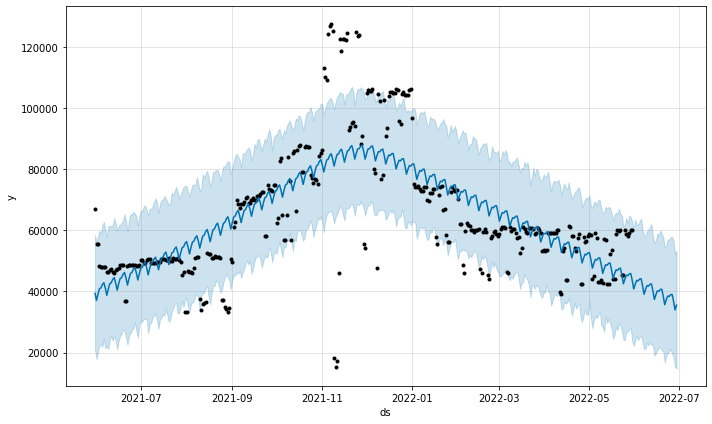

In [ ]:
fig1 = m.plot(forecast)

#Explore Yearly, Weekly & Monthly Trends

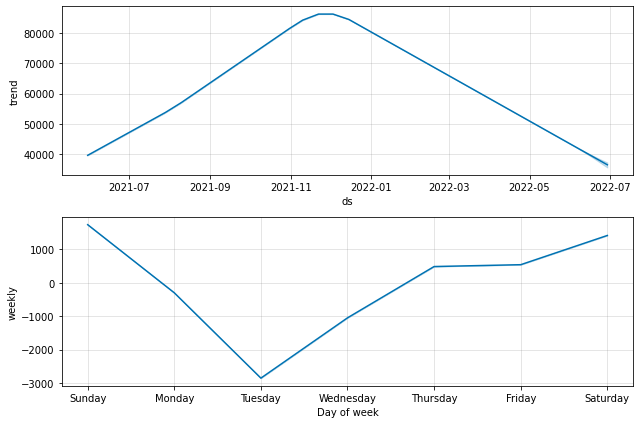

In [ ]:
fig2 = m.plot_components(forecast)

##❎ It might be finished as is but feel free to move through the next scripts to get even more granular comparison

###**[Optional]**
Pick a forecast date in the past to evaluate how well your actual data did vs. your model's prediction:

In [ ]:
forecast_date = '12-01-2021'


#Remove data that occured after start date

In [ ]:
mask = (df['ds'] < forecast_date)
df2 = df.loc[mask]
df2.head()

,ds,y
0,2021-05-31,66955
1,2021-06-01,55444
2,2021-06-02,55389
3,2021-06-03,48441
4,2021-06-04,48071


#Make & Fit Model + Forecast data points

In [ ]:

# Make model and fit it
m2 = Prophet()
m2.fit(df2)

# Make a future data frame
future = m2.make_future_dataframe(periods=90)
future.tail()

# Predict the GA data over the future period
forecast = m2.predict(future)
forecast.tail()
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
269,2022-02-24,137642.690865,115397.281993,156811.408856,132779.259689,142191.783792,-1816.936812,-1816.936812,-1816.936812,-1816.936812,-1816.936812,-1816.936812,0.0,0.0,0.0,135825.754053
270,2022-02-25,138092.242470,115828.982714,157526.196330,133096.579081,142742.536952,-857.863649,-857.863649,-857.863649,-857.863649,-857.863649,-857.863649,0.0,0.0,0.0,137234.378821
271,2022-02-26,138541.794075,120729.383813,162302.979877,133453.651831,143293.945119,2306.146121,2306.146121,2306.146121,2306.146121,2306.146121,2306.146121,0.0,0.0,0.0,140847.940196
272,2022-02-27,138991.345680,120724.214793,161406.041443,133800.903318,143817.824888,2089.621512,2089.621512,2089.621512,2089.621512,2089.621512,2089.621512,0.0,0.0,0.0,141080.967192
273,2022-02-28,139440.897284,119536.442057,161295.992058,134168.902706,144359.264792,822.932960,822.932960,822.932960,822.932960,822.932960,822.932960,0.0,0.0,0.0,140263.830244


#Plot the model's prediction

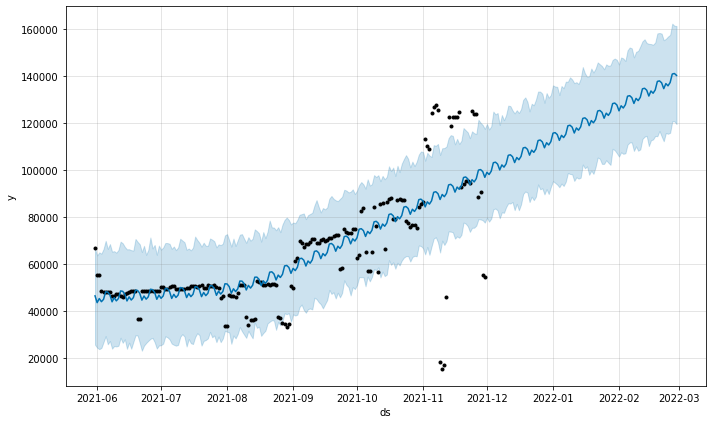

In [ ]:
# plot the forecast
fig2 = m2.plot(forecast)

In [ ]:
# Merge actuals with forecast
forecast_plot = forecast[['ds', 'yhat']]
df_inner = pd.merge(forecast_plot, df, on='ds', how='inner')
df_inner.tail()

,ds,yhat,y
269,2022-02-24,135825.754053,58288
270,2022-02-25,137234.378821,59475
271,2022-02-26,140847.940196,59941
272,2022-02-27,141080.967192,58832
273,2022-02-28,140263.830244,58245


In [ ]:

mask = (df_inner['ds'] > forecast_date)
df2_plot = df_inner.loc[mask]
df2_plot.tail()

,ds,yhat,y
269,2022-02-24,135825.754053,58288
270,2022-02-25,137234.378821,59475
271,2022-02-26,140847.940196,59941
272,2022-02-27,141080.967192,58832
273,2022-02-28,140263.830244,58245


#Evaluate actual results vs forecast to see how you did against the model's prediction

Prediction values are the light blue dashed line.

Actual values are the solid black line.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  after removing the cwd from sys.path.


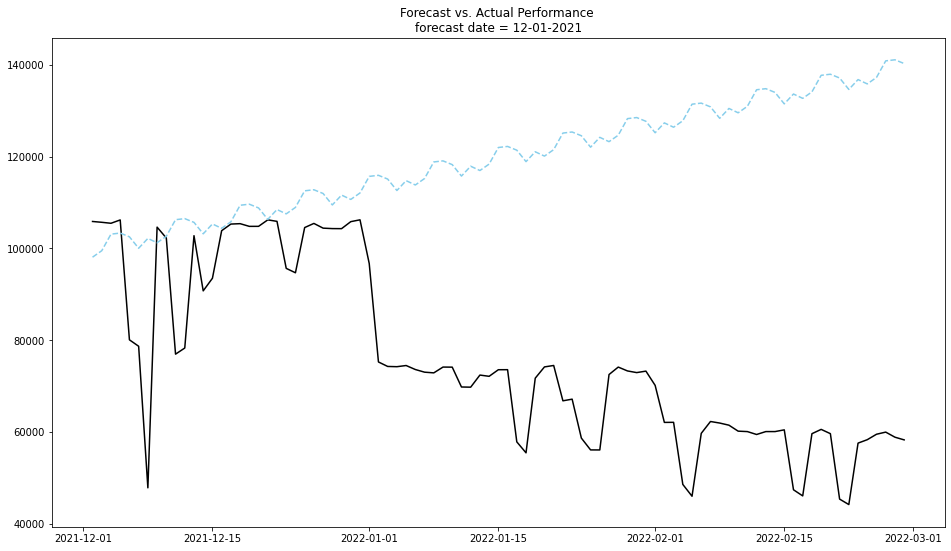

In [ ]:
# Plot actuals vs forecast
plt.figure(figsize=(16, 9))
plt.title(label='Forecast vs. Actual Performance \n' + 'forecast date = ' + forecast_date)
plt.plot('ds', 'y', data=df2_plot, color='black')
plt.plot('ds', 'yhat', data=df2_plot, color ='skyblue', linestyle='dashed')
plt.show()